In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy import stats

plt.rcParams["font.family"] = "Pretendard"
df = pd.read_csv("../stats.csv", encoding="utf-8")
df.drop(columns=["avg_swing_speed", "fast_swing_rate", "blasts_contact", "blasts_swing", "squared_up_contact", "squared_up_swing", "avg_swing_length", "swords", "on_base_plus_slg", "woba", "slg_percent", "on_base_percent", "xba", "xwoba", "xslg", "xiso", "xobp"], inplace=True)

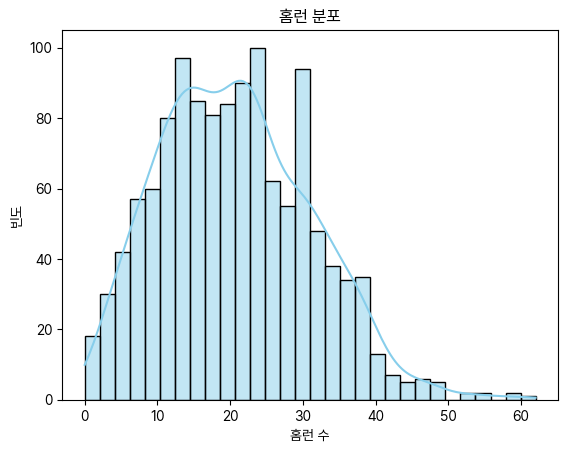

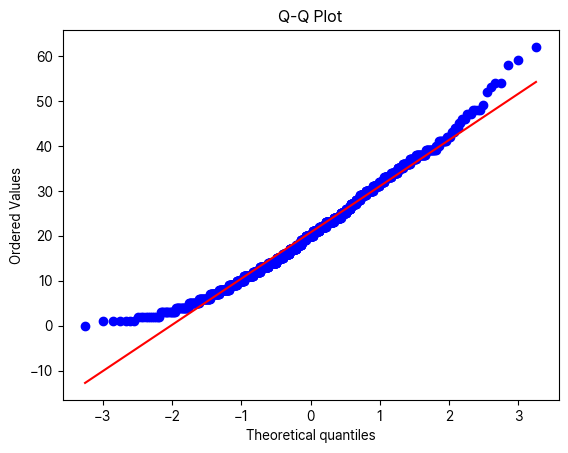

In [2]:
sns.histplot(df["home_run"], bins=30, kde=True, color="skyblue")
plt.title("홈런 분포")
plt.xlabel("홈런 수")
plt.ylabel("빈도")
plt.show()

stats.probplot(df["home_run"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [3]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

                    correlation   p_value
b_rbi                  0.846077  0.000000
barrel_batted_rate     0.692475  0.000000
r_run                  0.667743  0.000000
b_swinging_strike      0.609325  0.000000
strikeout              0.592917  0.000000
avg_best_speed         0.578517  0.000000
avg_hyper_speed        0.569445  0.000000
walk                   0.544429  0.000000
exit_velocity_avg      0.543870  0.000000
hard_hit_percent       0.530975  0.000000
pa                     0.525126  0.000000
ab                     0.478455  0.000000
b_foul                 0.476443  0.000000
hit                    0.455036  0.000000
launch_angle_avg       0.396230  0.000000
double                 0.390694  0.000000
whiff_percent          0.318502  0.000000
bb_percent             0.284064  0.000000
k_percent              0.255681  0.000000
sweet_spot_percent     0.191969  0.000000
single                 0.109545  0.000116
batting_avg            0.106695  0.000174
swing_percent         -0.009092  0

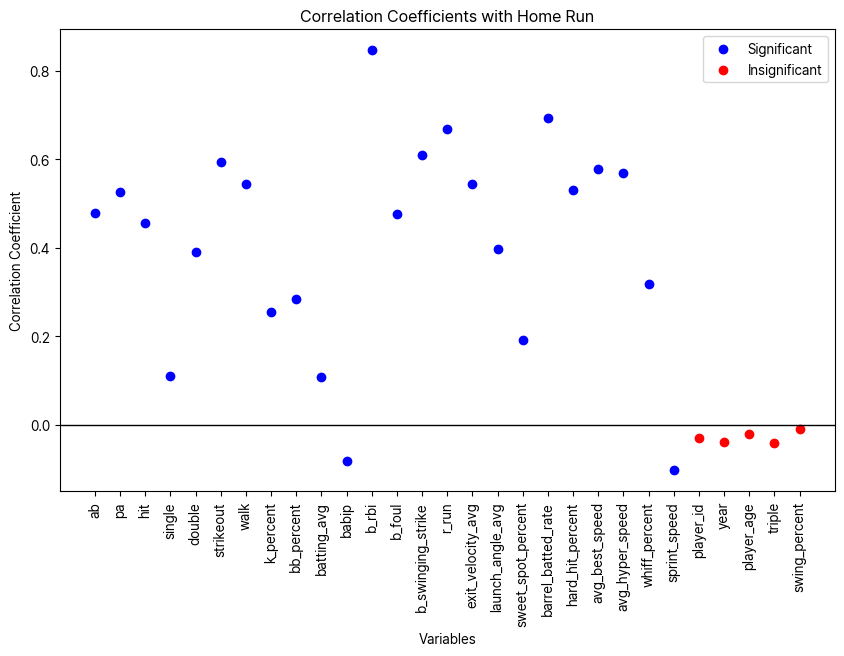

In [4]:
correlations = []
p_values = []

df.dropna(axis=1, inplace=True)

# 상관계수와 p-value 계산
for col in numeric_columns.drop("home_run"):
    corr, p_value = pearsonr(df["home_run"], df[col])
    correlations.append(corr)
    p_values.append(p_value)

correlation_df = pd.DataFrame(correlations, columns=["correlation"], index=numeric_columns.drop("home_run"))
p_value_df = pd.DataFrame(p_values, columns=["p_value"], index=numeric_columns.drop("home_run"))

# p-value 소수점 형태로 변환
p_value_df["p_value"] = p_value_df["p_value"].apply(lambda x: f"{x:.6f}")

# 상관계수와 p-value 결합
result_df = pd.concat([correlation_df, p_value_df], axis=1)

# correlation 기준으로 내림차순 정렬
result_df_sorted = result_df.sort_values(by="correlation", ascending=False)

print(result_df_sorted)

# p-value 기준으로 유의미한 변수 구분
significant = p_value_df["p_value"].astype(float) < 0.05
insignificant = p_value_df["p_value"].astype(float) >= 0.05

# 시각화
plt.figure(figsize=(10, 6))

# 유의미한 상관관계가 있는 변수
plt.scatter(correlation_df.loc[significant].index, correlation_df.loc[significant]["correlation"], color="blue", label="Significant")

# 유의미하지 않은 상관관계가 있는 변수
plt.scatter(correlation_df.loc[insignificant].index, correlation_df.loc[insignificant]["correlation"], color="red", label="Insignificant")

plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.title("Correlation Coefficients with Home Run")
plt.legend()
plt.show()

타구 스피드와 홈런의 상관계수: 0.54


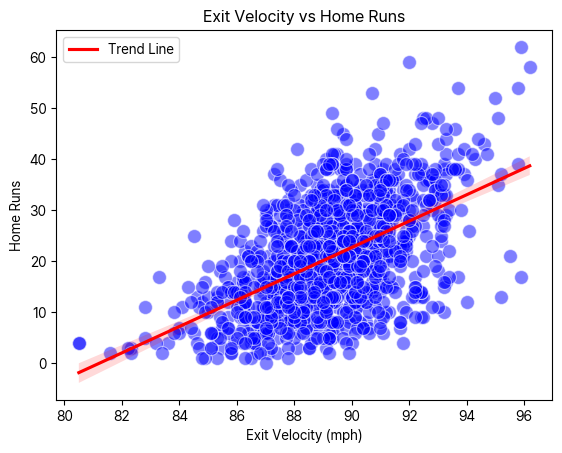

In [5]:
print(f"타구 스피드와 홈런의 상관계수: {result_df.loc['exit_velocity_avg']['correlation']:.2f}")

# 시각화: 타구 스피드 vs 홈런
sns.scatterplot(x="exit_velocity_avg", y="home_run", data=df, color="blue", s=100, alpha=0.5)
sns.regplot(x="exit_velocity_avg", y="home_run", data=df, scatter=False, color="red", label="Trend Line")
plt.title("Exit Velocity vs Home Runs")
plt.xlabel("Exit Velocity (mph)")
plt.ylabel("Home Runs")
plt.legend()
plt.show()

발사각과 홈런의 상관계수: 0.40
배럴 타구율과 홈런의 상관계수: 0.69


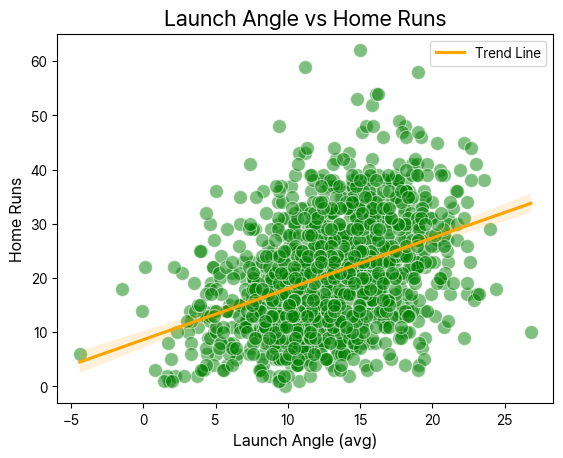

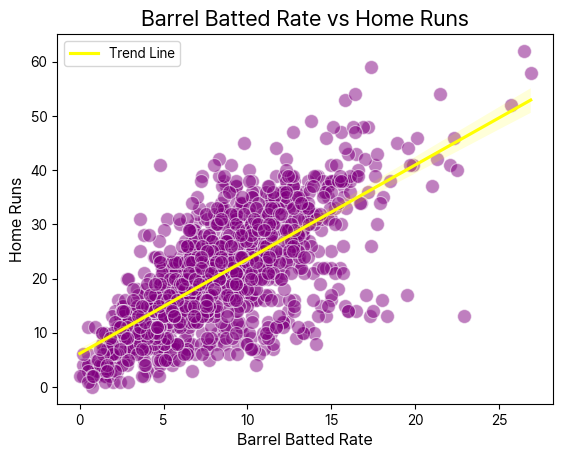

In [6]:
# 발사각, 배럴 타구율과 홈런의 상관계수 계산
print(f"발사각과 홈런의 상관계수: {result_df.loc['launch_angle_avg']['correlation']:.2f}")
print(f"배럴 타구율과 홈런의 상관계수: {result_df.loc['barrel_batted_rate']['correlation']:.2f}")

# 시각화: 발사각 vs 홈런
sns.scatterplot(x="launch_angle_avg", y="home_run", data=df, color="green", s=100, alpha=0.5)
sns.regplot(x="launch_angle_avg", y="home_run", data=df, scatter=False, color="orange", label="Trend Line")
plt.title("Launch Angle vs Home Runs", fontsize=16)
plt.xlabel("Launch Angle (avg)", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()

# 시각화: 배럴 타구율 vs 홈런
sns.scatterplot(x="barrel_batted_rate", y="home_run", data=df, color="purple", s=100, alpha=0.5)
sns.regplot(x="barrel_batted_rate", y="home_run", data=df, scatter=False, color="yellow", label="Trend Line")
plt.title("Barrel Batted Rate vs Home Runs", fontsize=16)
plt.xlabel("Barrel Batted Rate", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()

스윗 스팟 비율과 홈런의 상관계수: 0.19
강한 타구 비율과 홈런의 상관계수: 0.53


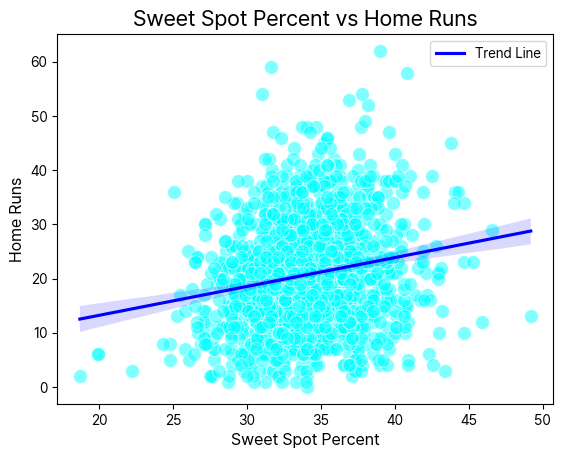

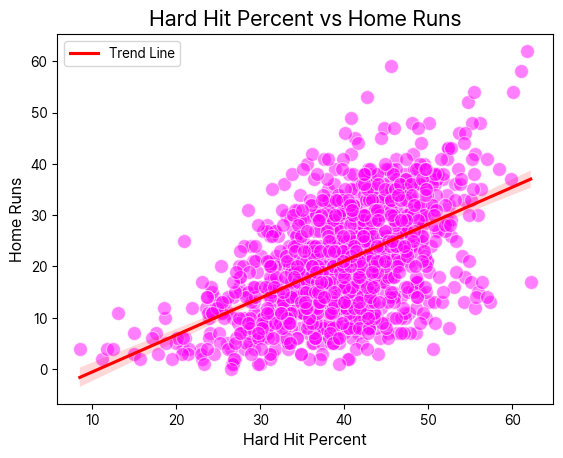

In [7]:
print(f"스윗 스팟 비율과 홈런의 상관계수: {result_df.loc['sweet_spot_percent']['correlation']:.2f}")
print(f"강한 타구 비율과 홈런의 상관계수: {result_df.loc['hard_hit_percent']['correlation']:.2f}")

# 시각화: 스윗 스팟 비율 vs 홈런
sns.scatterplot(x="sweet_spot_percent", y="home_run", data=df, color="cyan", s=100, alpha=0.5)
sns.regplot(x="sweet_spot_percent", y="home_run", data=df, scatter=False, color="blue", label="Trend Line")
plt.title("Sweet Spot Percent vs Home Runs", fontsize=16)
plt.xlabel("Sweet Spot Percent", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()

# 시각화: 강한 타구 비율 vs 홈런
sns.scatterplot(x="hard_hit_percent", y="home_run", data=df, color="magenta", s=100, alpha=0.5)
sns.regplot(x="hard_hit_percent", y="home_run", data=df, scatter=False, color="red", label="Trend Line")
plt.title("Hard Hit Percent vs Home Runs", fontsize=16)
plt.xlabel("Hard Hit Percent", fontsize=12)
plt.ylabel("Home Runs", fontsize=12)
plt.legend()
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

target = "home_run"
X = df[result_df_sorted.head(15).index]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("성능:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")
print(f'Adjusted R2: {adjusted_r2:.2f}')
print()

# 각 특성의 계수와 중요도 확인
feature_importance = pd.DataFrame({
    "feature": result_df_sorted.head(15).index,
    "coefficient": model.coef_
})
feature_importance = feature_importance.sort_values("coefficient", key=abs, ascending=False)

print("feature 중요도:")
print(feature_importance.reset_index(drop=True))

성능:
RMSE: 3.27
R2 Score: 0.89
Adjusted R2: 0.89

feature 중요도:
               feature  coefficient
0      avg_hyper_speed    -2.091810
1       avg_best_speed     1.800678
2   barrel_batted_rate     0.833231
3     launch_angle_avg     0.249286
4                b_rbi     0.246411
5     hard_hit_percent    -0.231393
6                r_run     0.156193
7                   ab     0.091076
8                   pa    -0.088962
9                 walk     0.069510
10                 hit    -0.054138
11   exit_velocity_avg    -0.011643
12           strikeout     0.005630
13              b_foul    -0.003274
14   b_swinging_strike     0.002736
